In [1]:
# %% load libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

In [6]:
# %%  matplotlib viz setup
rc('font',**{'family':'serif','serif':['Avant Garde']})
rc('text', usetex=False)

In [3]:
# %% setup
wd = os.getcwd()

In [4]:
# %% read data

# target data file
in_file = os.path.join(wd, 'data', 'movieIndustry', 'lead_actor_race.csv')

# df
df = pd.read_csv(in_file)

In [10]:
# read data
years, n, perc = [], [], []
with open(in_file, 'r') as pipe:
    for line in pipe.readlines()[1:]:   # start from the second row because first row is the headers of each column 
        parsed = line.split(',')
        years.append(int(parsed[0]))
        n.append(int(parsed[1]))
        perc.append(float(parsed[2].strip()))

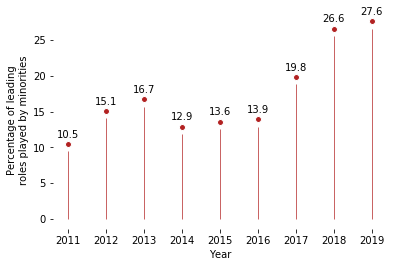

In [15]:
# %% viz

# figure
fig = plt.figure(figsize=(6, 4))

# add plot
ax = fig.add_subplot(111)

# plot data
ax.scatter(df['year'], df['minority'], marker='o', color='firebrick',
           edgecolor='w')
ax.vlines(x=df['year'], ymin=0, ymax=df['minority'] - 1, color='firebrick',
          alpha=0.7, linewidth=1)

# text boxes
for i in range(len(years)):
    x_pos = years[i]
    y_pos = perc[i] + 2
    string = '% s'% perc[i]
    ax.text(x_pos, y_pos, string, horizontalalignment='center', 
            verticalalignment='top')

# axes
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of leading\nroles played by minorities')


# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# save plot
out_f = os.path.join(os.getcwd(), 'lollipop_chart.png')
plt.savefig(out_f,
            transparent=True,
            bbox_inches='tight',
            pad_inches=0,
            dpi=600)

# show plot
plt.show()